# Imports

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import string
import os

# Data Reading

In [3]:
DATA_DIR = "Dataset/titanic dataset/"
df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
TARGET_COL = ["Survived"]
ID_COL = ["PassengerId"]
TEXT_FEATURES = ["Name"]
CAT_FEATURES = [col for col in df.columns if df[col].dtype == "O" if col not in TARGET_COL+ID_COL+TEXT_FEATURES]
NUM_FEATURES = [col for col in df.columns if df[col].dtype != "O" if col not in TARGET_COL+ID_COL+TEXT_FEATURES]

In [21]:
print("id column: ", ID_COL)
print("target column: ", TARGET_COL)
print("categorical columns: ", CAT_FEATURES)
print("numerical columns: ", NUM_FEATURES)
print("text features: ", TEXT_FEATURES)

id column:  ['PassengerId']
target column:  ['Survived']
categorical columns:  ['Sex', 'Ticket', 'Cabin', 'Embarked']
numerical columns:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
text features:  ['Name']


## Text Feature Cleaning

In [103]:
TEXT_DF = df[TEXT_FEATURES].copy()

In [104]:
TEXT_DF.head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [105]:
# lower the text/ text normalization
TEXT_DF["Lower"] = TEXT_DF["Name"].apply(lambda x: x.lower())

In [106]:
TEXT_DF.head()

,Name,Lower
0,"Braund, Mr. Owen Harris","braund, mr. owen harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...","cumings, mrs. john bradley (florence briggs th..."
2,"Heikkinen, Miss. Laina","heikkinen, miss. laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","futrelle, mrs. jacques heath (lily may peel)"
4,"Allen, Mr. William Henry","allen, mr. william henry"


In [107]:
# removing puntuations
TEXT_DF["No_punc"] = TEXT_DF["Lower"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [108]:
TEXT_DF.head()

,Name,Lower,No_punc
0,"Braund, Mr. Owen Harris","braund, mr. owen harris",braund mr owen harris
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...","cumings, mrs. john bradley (florence briggs th...",cumings mrs john bradley florence briggs thayer
2,"Heikkinen, Miss. Laina","heikkinen, miss. laina",heikkinen miss laina
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","futrelle, mrs. jacques heath (lily may peel)",futrelle mrs jacques heath lily may peel
4,"Allen, Mr. William Henry","allen, mr. william henry",allen mr william henry


In [237]:
# add list of words
TEXT_DF["Name"] = TEXT_DF["No_punc"].apply(lambda x: x.split(' '))

In [238]:
TEXT_DF.head()

,Name,Lower,No_punc,Words
0,"[braund, mr, owen, harris]","braund, mr. owen harris",braund mr owen harris,"[braund, mr, owen, harris]"
1,"[cumings, mrs, john, bradley, florence, briggs...","cumings, mrs. john bradley (florence briggs th...",cumings mrs john bradley florence briggs thayer,"[cumings, mrs, john, bradley, florence, briggs..."
2,"[heikkinen, miss, laina]","heikkinen, miss. laina",heikkinen miss laina,"[heikkinen, miss, laina]"
3,"[futrelle, mrs, jacques, heath, lily, may, peel]","futrelle, mrs. jacques heath (lily may peel)",futrelle mrs jacques heath lily may peel,"[futrelle, mrs, jacques, heath, lily, may, peel]"
4,"[allen, mr, william, henry]","allen, mr. william henry",allen mr william henry,"[allen, mr, william, henry]"


In [241]:
TEXT_DF[["Name"]].head()

,Name
0,"[braund, mr, owen, harris]"
1,"[cumings, mrs, john, bradley, florence, briggs..."
2,"[heikkinen, miss, laina]"
3,"[futrelle, mrs, jacques, heath, lily, may, peel]"
4,"[allen, mr, william, henry]"


In [242]:
TEXT_DF[["Name"]].tail()

,Name
886,"[montvila, rev, juozas]"
887,"[graham, miss, margaret, edith]"
888,"[johnston, miss, catherine, helen, carrie]"
889,"[behr, mr, karl, howell]"
890,"[dooley, mr, patrick]"


- Text cleaning and processing exnds here

## Categorical Feature Cleaning and Processing

In [170]:
CAT_FEATURES

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [171]:
CAT_DF = df[CAT_FEATURES].copy()

In [172]:
CAT_DF.shape

(891, 4)

### Unique categories

In [173]:
CAT_DF.nunique()

Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

### Missing values

In [174]:
CAT_DF.isna().sum()

Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [175]:
CAT_DF.isna().sum()/ df.shape[0]

Sex         0.000000
Ticket      0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

#### Embraked

- `Embarked` -> missing values -> mode

In [176]:
# embarked mode
mode = CAT_DF["Embarked"].mode()

In [184]:
mode[0]

'S'

In [185]:
# missing value imputed with mode
CAT_DF["Embarked"].fillna(value=mode[0], axis=0,inplace=True)

In [186]:
CAT_DF.isna().sum()

Sex           0
Ticket        0
Cabin       687
Embarked      0
dtype: int64

#### Cabin

In [187]:
# Cabin
CAT_DF.shape

(891, 4)

In [188]:
# not missing = all - missing
print("Data points in cabin :", CAT_DF.shape[0] - CAT_DF["Cabin"].isna().sum())

Data points in cabin : 204


In [189]:
# patterns = not missing - unique
print("Patterns in cabin :", 204 - CAT_DF["Cabin"].nunique())

Patterns in cabin : 57


#### How those patterns look like

In [190]:
Counter(CAT_DF["Cabin"].dropna().to_list())

Counter({'G6': 4,
         'C23 C25 C27': 4,
         'B96 B98': 4,
         'F33': 3,
         'E101': 3,
         'F2': 3,
         'D': 3,
         'C22 C26': 3,
         'C123': 2,
         'D33': 2,
         'C52': 2,
         'B28': 2,
         'C83': 2,
         'F G73': 2,
         'D26': 2,
         'B58 B60': 2,
         'C2': 2,
         'E33': 2,
         'F4': 2,
         'D36': 2,
         'C93': 2,
         'C78': 2,
         'D35': 2,
         'B77': 2,
         'E67': 2,
         'C125': 2,
         'B49': 2,
         'C65': 2,
         'B57 B59 B63 B66': 2,
         'B18': 2,
         'C124': 2,
         'B35': 2,
         'E44': 2,
         'C92': 2,
         'D20': 2,
         'E25': 2,
         'B22': 2,
         'C68': 2,
         'C126': 2,
         'B51 B53 B55': 2,
         'B5': 2,
         'B20': 2,
         'E24': 2,
         'E8': 2,
         'E121': 2,
         'D17': 2,
         'C85': 1,
         'E46': 1,
         'C103': 1,
         'D56': 1,
         

- `Cabin` -> missing values -> 'Missing' 

In [191]:
# missing value imputed with mode
CAT_DF["Cabin"].fillna("Missing", inplace=True)

In [192]:
CAT_DF.isna().sum()

Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

## Numerical Feature Cleaning and Processing

In [193]:
NUM_DF = df[NUM_FEATURES].copy()

In [194]:
NUM_DF.shape

(891, 5)

In [195]:
NUM_DF.isna().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [196]:
NUM_DF.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


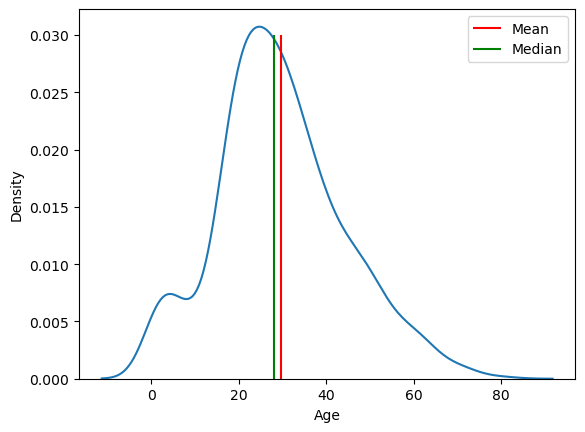

In [225]:
sns.kdeplot(data=NUM_DF, x="Age")
plt.vlines(ymin=0,ymax=0.03, x=NUM_DF.Age.mean(), label="Mean", colors="red")
plt.vlines(ymin=0,ymax=0.03, x=NUM_DF.Age.median(), label="Median", colors="green")
plt.legend()
plt.show()

- there are outliers in data
- will impute with median

In [226]:
# missing value imputed with median
median = NUM_DF["Age"].median()
NUM_DF["Age"].fillna(median, inplace=True)

In [227]:
NUM_DF.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [244]:
clean_df = pd.concat([df[ID_COL+TARGET_COL], NUM_DF, CAT_DF, TEXT_DF[TEXT_FEATURES]], axis=1)

In [245]:
clean_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked,Name
0,1,0,3,22.0,1,0,7.2500,male,A/5 21171,Missing,S,"[braund, mr, owen, harris]"
1,2,1,1,38.0,1,0,71.2833,female,PC 17599,C85,C,"[cumings, mrs, john, bradley, florence, briggs..."
2,3,1,3,26.0,0,0,7.9250,female,STON/O2. 3101282,Missing,S,"[heikkinen, miss, laina]"
3,4,1,1,35.0,1,0,53.1000,female,113803,C123,S,"[futrelle, mrs, jacques, heath, lily, may, peel]"
4,5,0,3,35.0,0,0,8.0500,male,373450,Missing,S,"[allen, mr, william, henry]"


In [246]:
clean_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
Ticket         0
Cabin          0
Embarked       0
Name           0
dtype: int64

In [247]:
clean_df.to_csv(os.path.join(DATA_DIR, "clean_train.csv"), index=False)